<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING NECESSARY LIBRARIES**


In [103]:
import pandas as pd                              #Pandas is used for analysing,cleaning and manipulating data
import numpy as np                               #Numpy is used for mathematical operations and array
import seaborn as sns                            #Seaborn is used for making statistical graphs
import matplotlib.pyplot as plt                  #Matplotlib is used to create interactive and static visualization
from sklearn.preprocessing import OneHotEncoder  #OneHotEncoder is used to deal with categorical data
from sklearn.feature_selection import chi2       #Computes chi square test for independence between features and target variable

IMPORTING DATASET

In [104]:
data = pd.read_csv("/content/Invistico_Airline.csv") #Importing the dataset
data.head() #Printing the first five rows of the data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [105]:
#Adding the numeric data types to one variable as they will be seperately used for analysis later
data_num = data[['Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance']]

MISSING VALUE DETECTION

In [106]:
#Checking for missing values. There are some in the attribute Arrival Delay in Minutes
data.isnull().sum().to_frame().rename(columns={0:"No. of Missing Values"})

,No. of Missing Values
satisfaction,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0


In [107]:
#Replacing missing values by the mean of the attribute
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].mean(),inplace=True)

In [108]:
#This prints the summary of the dataset, data types
data.info()
# We can see from the output that the null values in the column has been replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [109]:
#It gives a statistical summary of the dataset: Standard Deviation,Mean,Quartiles, Max value, Min value
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.407410
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# BINNING - CATEGORIZING AGE

In [112]:
#Binning has been used to convert the numerical data of Age into Categorical data for ease in analysis
bins = [0,20,40,60,80,100]
labels = ['0-20','20-40','40-60','60-80','80+']
data['AgeCat'] = pd.cut(data['Age'],bins, labels=labels)

In [113]:
data['AgeCat']

0         60-80
1         40-60
2          0-20
3         40-60
4         60-80
          ...  
129875    20-40
129876    60-80
129877    60-80
129878    60-80
129879    20-40
Name: AgeCat, Length: 129880, dtype: category
Categories (5, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80+']

# EXPLORATORY DATA ANALYSIS

Visualising the data Using Bar Plot

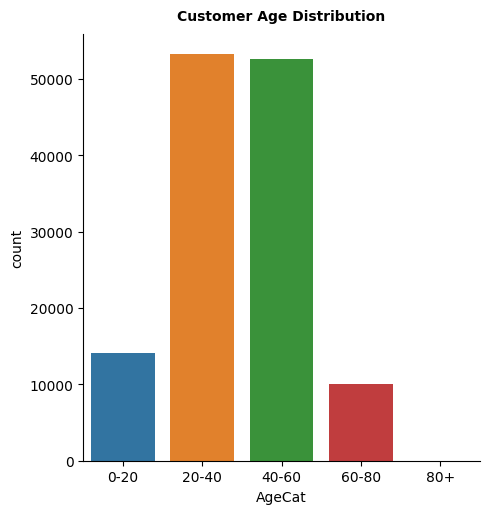

In [114]:
#the Catplot is used to draw categorical plots
sns.catplot(x ="AgeCat",kind ="count", data=data)
plt.title("Customer Age Distribution",fontweight="black",size=10,pad=10)
plt.show()

In [115]:
#A function named bar_chart was defined so that various categorical data can be visualised against the target variable
def bar_chart(feature):
    satisfied = data[data['satisfaction']=='satisfied'][feature].value_counts() #counts the number of feature values of the customer was satisfied
    not_satisfied = data[data['satisfaction']=='dissatisfied'][feature].value_counts()
    df = pd.DataFrame([satisfied,not_satisfied]) #Converting the two groups into a dataframe
    df.index=['Satisfied','Not Satisfied'] #Labelling the two categories
    df.plot(kind='bar',stacked=True,fig=(18,6),title=feature) #Plotting the bar chart with stacked=True, because we want a stacked bar chart

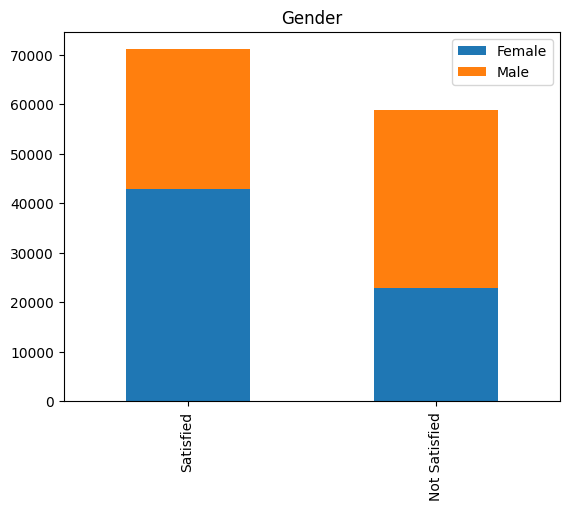

In [116]:
#Visualising how which genders were satisfied and which were not
bar_chart("Gender")
#We can see that more female customers were satisfied and more male customers were unsatisfied

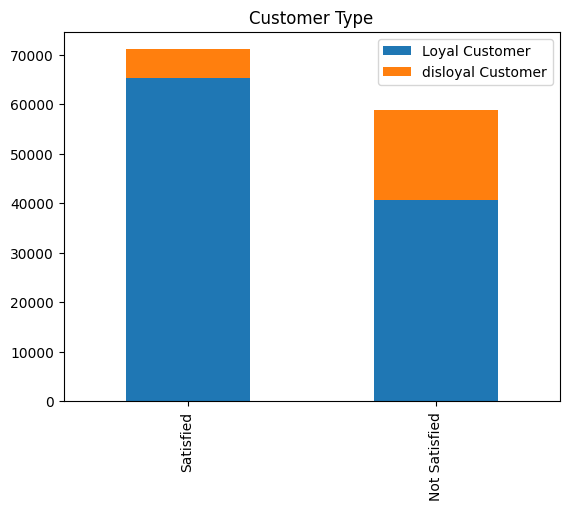

In [118]:
#Visualing which customer type was satisfied and which was not
bar_chart("Customer Type")
#Loyal Customers were satisfied for the most part and more disloyal customers were dissatisfied

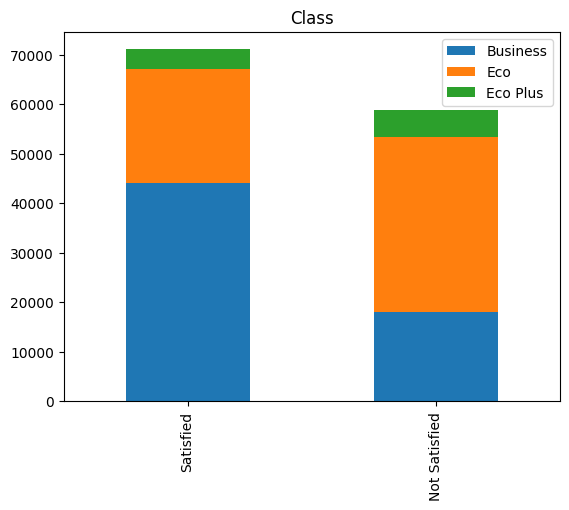

In [119]:
#Comparing between classes and their satisfaction levels
bar_chart("Class")
#Business class people were satisfied the most whereas Economy class students were dissatisfied the most

In [120]:
#Taking all the categorical variables under one variable for easy analysis
data_cat = data.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes','Flight Distance'])

In [123]:
#There were some categorical columns whose data type was in int, so converting those to "category"
for cols in data_cat:
  data_cat[cols] = data_cat[cols].astype('category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   satisfaction                       129880 non-null  category
 1   Gender                             129880 non-null  category
 2   Customer Type                      129880 non-null  category
 3   Age                                129880 non-null  category
 4   Type of Travel                     129880 non-null  category
 5   Class                              129880 non-null  category
 6   Seat comfort                       129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Food and drink                     129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Inflight wifi service              129880 non-null  category
 11  Inflight entertainment    

In [124]:
#Converting the categorical data values into labels for easy analysis
for cols in data_cat:
  data_cat[cols] = data_cat[cols].cat.codes #codes can only run on categorical data
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   satisfaction                       129880 non-null  int8 
 1   Gender                             129880 non-null  int8 
 2   Customer Type                      129880 non-null  int8 
 3   Age                                129880 non-null  int8 
 4   Type of Travel                     129880 non-null  int8 
 5   Class                              129880 non-null  int8 
 6   Seat comfort                       129880 non-null  int8 
 7   Departure/Arrival time convenient  129880 non-null  int8 
 8   Food and drink                     129880 non-null  int8 
 9   Gate location                      129880 non-null  int8 
 10  Inflight wifi service              129880 non-null  int8 
 11  Inflight entertainment             129880 non-null  int8 
 12  On

**ONE-HOT ENCODING**

In [88]:
T#The onehotencoder technique converts categorical data to numerical data. It introduces dummy variables to the dataset
encoded = OneHotEncoder() #Calling the function
enc_data = pd.DataFrame(encoded.fit_transform(data_cat).toarray()) #Transforming the data and fitting it into a dataframe
new_data = data.join(enc_data) #Creating a new dataset to join the original data with the encoded data
new_data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,67,68,69,70,71,72,73,74,75,76
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [126]:
# Merging the numerical dataset and the categorical dataset for covariance matrix
df = data_num.join(data_cat)

**COVARIANCE MATRIX**

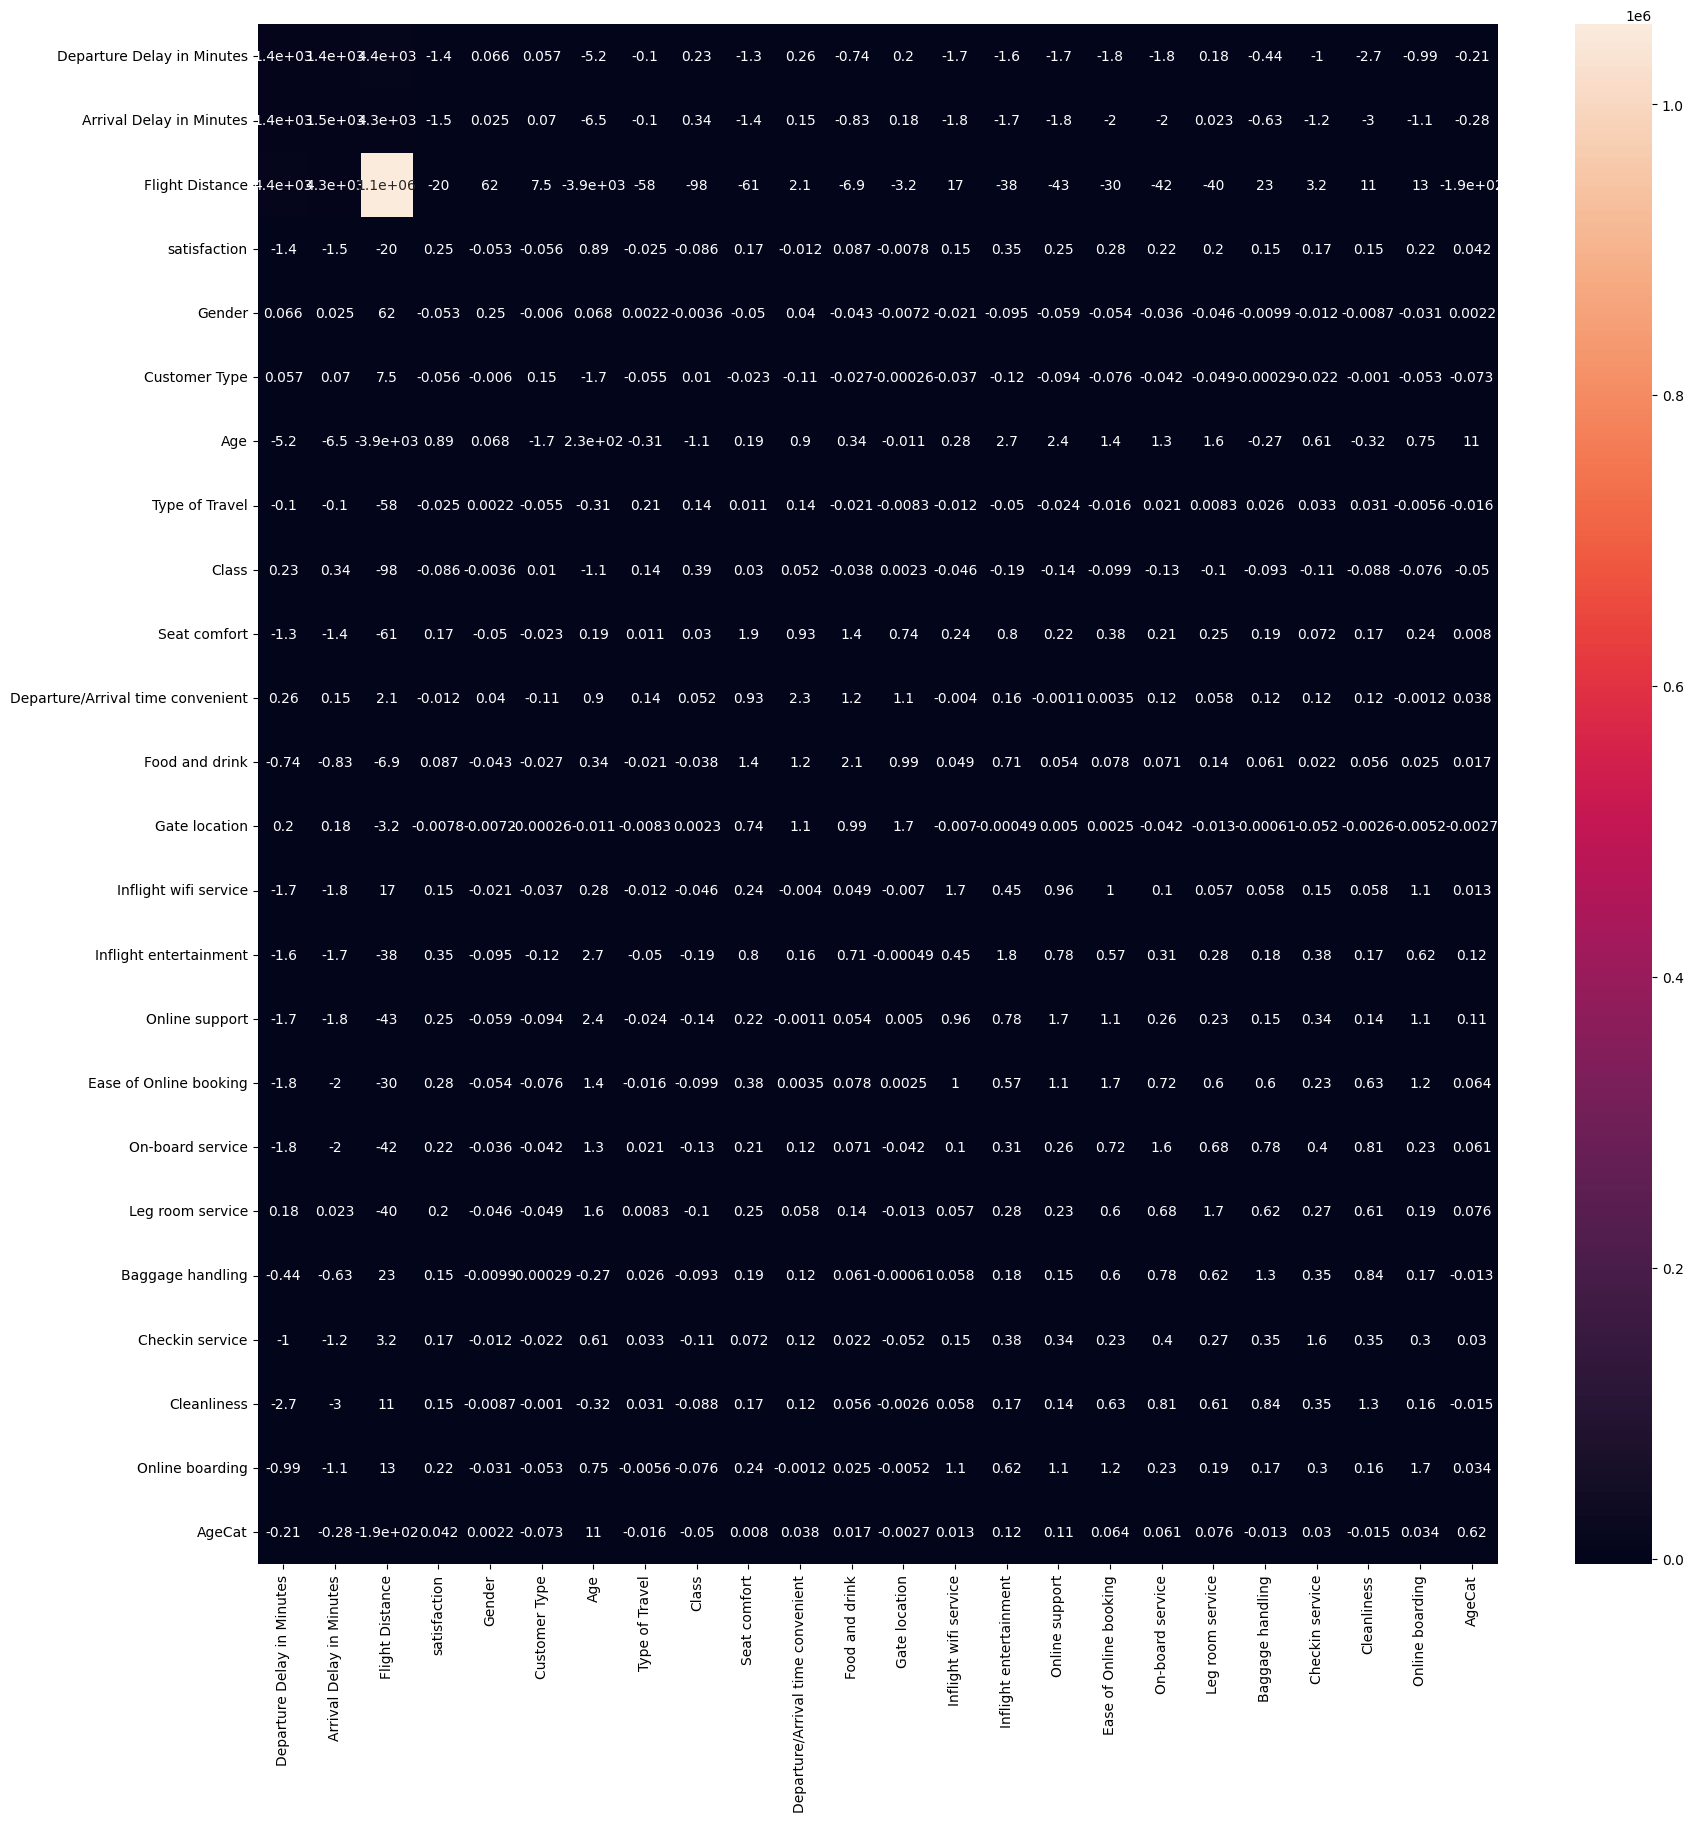

In [128]:
#Plotting the covariance matrix to check if two variables are moving in the same direction or not
plt.figure(figsize=(20,20))
cov_mat = pd.DataFrame.cov(df)
sns.heatmap(cov_mat,annot=True)
plt.show()

In [153]:
#Printing the covariance matrix
cov_mat

,Departure Delay in Minutes,Arrival Delay in Minutes,Flight Distance,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,AgeCat
Departure Delay in Minutes,1449.410651,1408.468314,4.401306e+03,-1.400594,0.066454,0.056821,-5.201926,-0.104066,0.225453,-1.263079,...,-1.562563,-1.692051,-1.816450,-1.821150,0.180039,-0.439631,-1.002824,-2.724549,-0.991098,-0.214294
Arrival Delay in Minutes,1408.468314,1479.606248,4.349047e+03,-1.544927,0.025172,0.070378,-6.538647,-0.103640,0.338502,-1.366559,...,-1.725122,-1.813344,-1.999047,-2.026402,0.023476,-0.630102,-1.156917,-2.977314,-1.088172,-0.283634
Flight Distance,4401.305784,4349.047087,1.054966e+06,-20.053592,61.931076,7.522723,-3877.163965,-58.286102,-98.328750,-60.676537,...,-38.078853,-42.972172,-29.902463,-42.499153,-40.237075,23.481735,3.179487,11.157881,12.810429,-188.535979
satisfaction,-1.400594,-1.544927,-2.005359e+01,0.247762,-0.052815,-0.056325,0.888062,-0.025135,-0.086272,0.168061,...,0.350748,0.253720,0.280588,0.222693,0.196134,0.149868,0.167017,0.148675,0.218593,0.042345
Gender,0.066454,0.025172,6.193108e+01,-0.052815,0.249947,-0.005986,0.068103,0.002196,-0.003596,-0.050218,...,-0.094859,-0.058879,-0.053610,-0.036272,-0.046085,-0.009862,-0.011658,-0.008663,-0.030758,0.002159
Customer Type,0.056821,0.070378,7.522723e+00,-0.056325,-0.005986,0.149571,-1.661812,-0.055105,0.010332,-0.023082,...,-0.122730,-0.094061,-0.075568,-0.041989,-0.048566,-0.000286,-0.021623,-0.001039,-0.053438,-0.073488
Age,-5.201926,-6.538647,-3.877164e+03,0.888062,0.068103,-1.661812,228.527948,-0.312925,-1.098217,0.185219,...,2.656238,2.394216,1.413633,1.282018,1.636552,-0.269805,0.606865,-0.317231,0.745559,11.049496
Type of Travel,-0.104066,-0.103640,-5.828610e+01,-0.025135,0.002196,-0.055105,-0.312925,0.213680,0.139802,0.010843,...,-0.049514,-0.023786,-0.015564,0.021089,0.008300,0.025886,0.033362,0.031096,-0.005624,-0.015659
Class,0.225453,0.338502,-9.832875e+01,-0.086272,-0.003596,0.010332,-1.098217,0.139802,0.386111,0.030314,...,-0.187559,-0.136760,-0.098699,-0.130635,-0.100625,-0.092763,-0.108230,-0.087681,-0.075781,-0.049874
Seat comfort,-1.263079,-1.366559,-6.067654e+01,0.168061,-0.050218,-0.023082,0.185219,0.010843,0.030314,1.940402,...,0.799604,0.218900,0.384695,0.214464,0.245051,0.190881,0.072370,0.174038,0.235899,0.007976


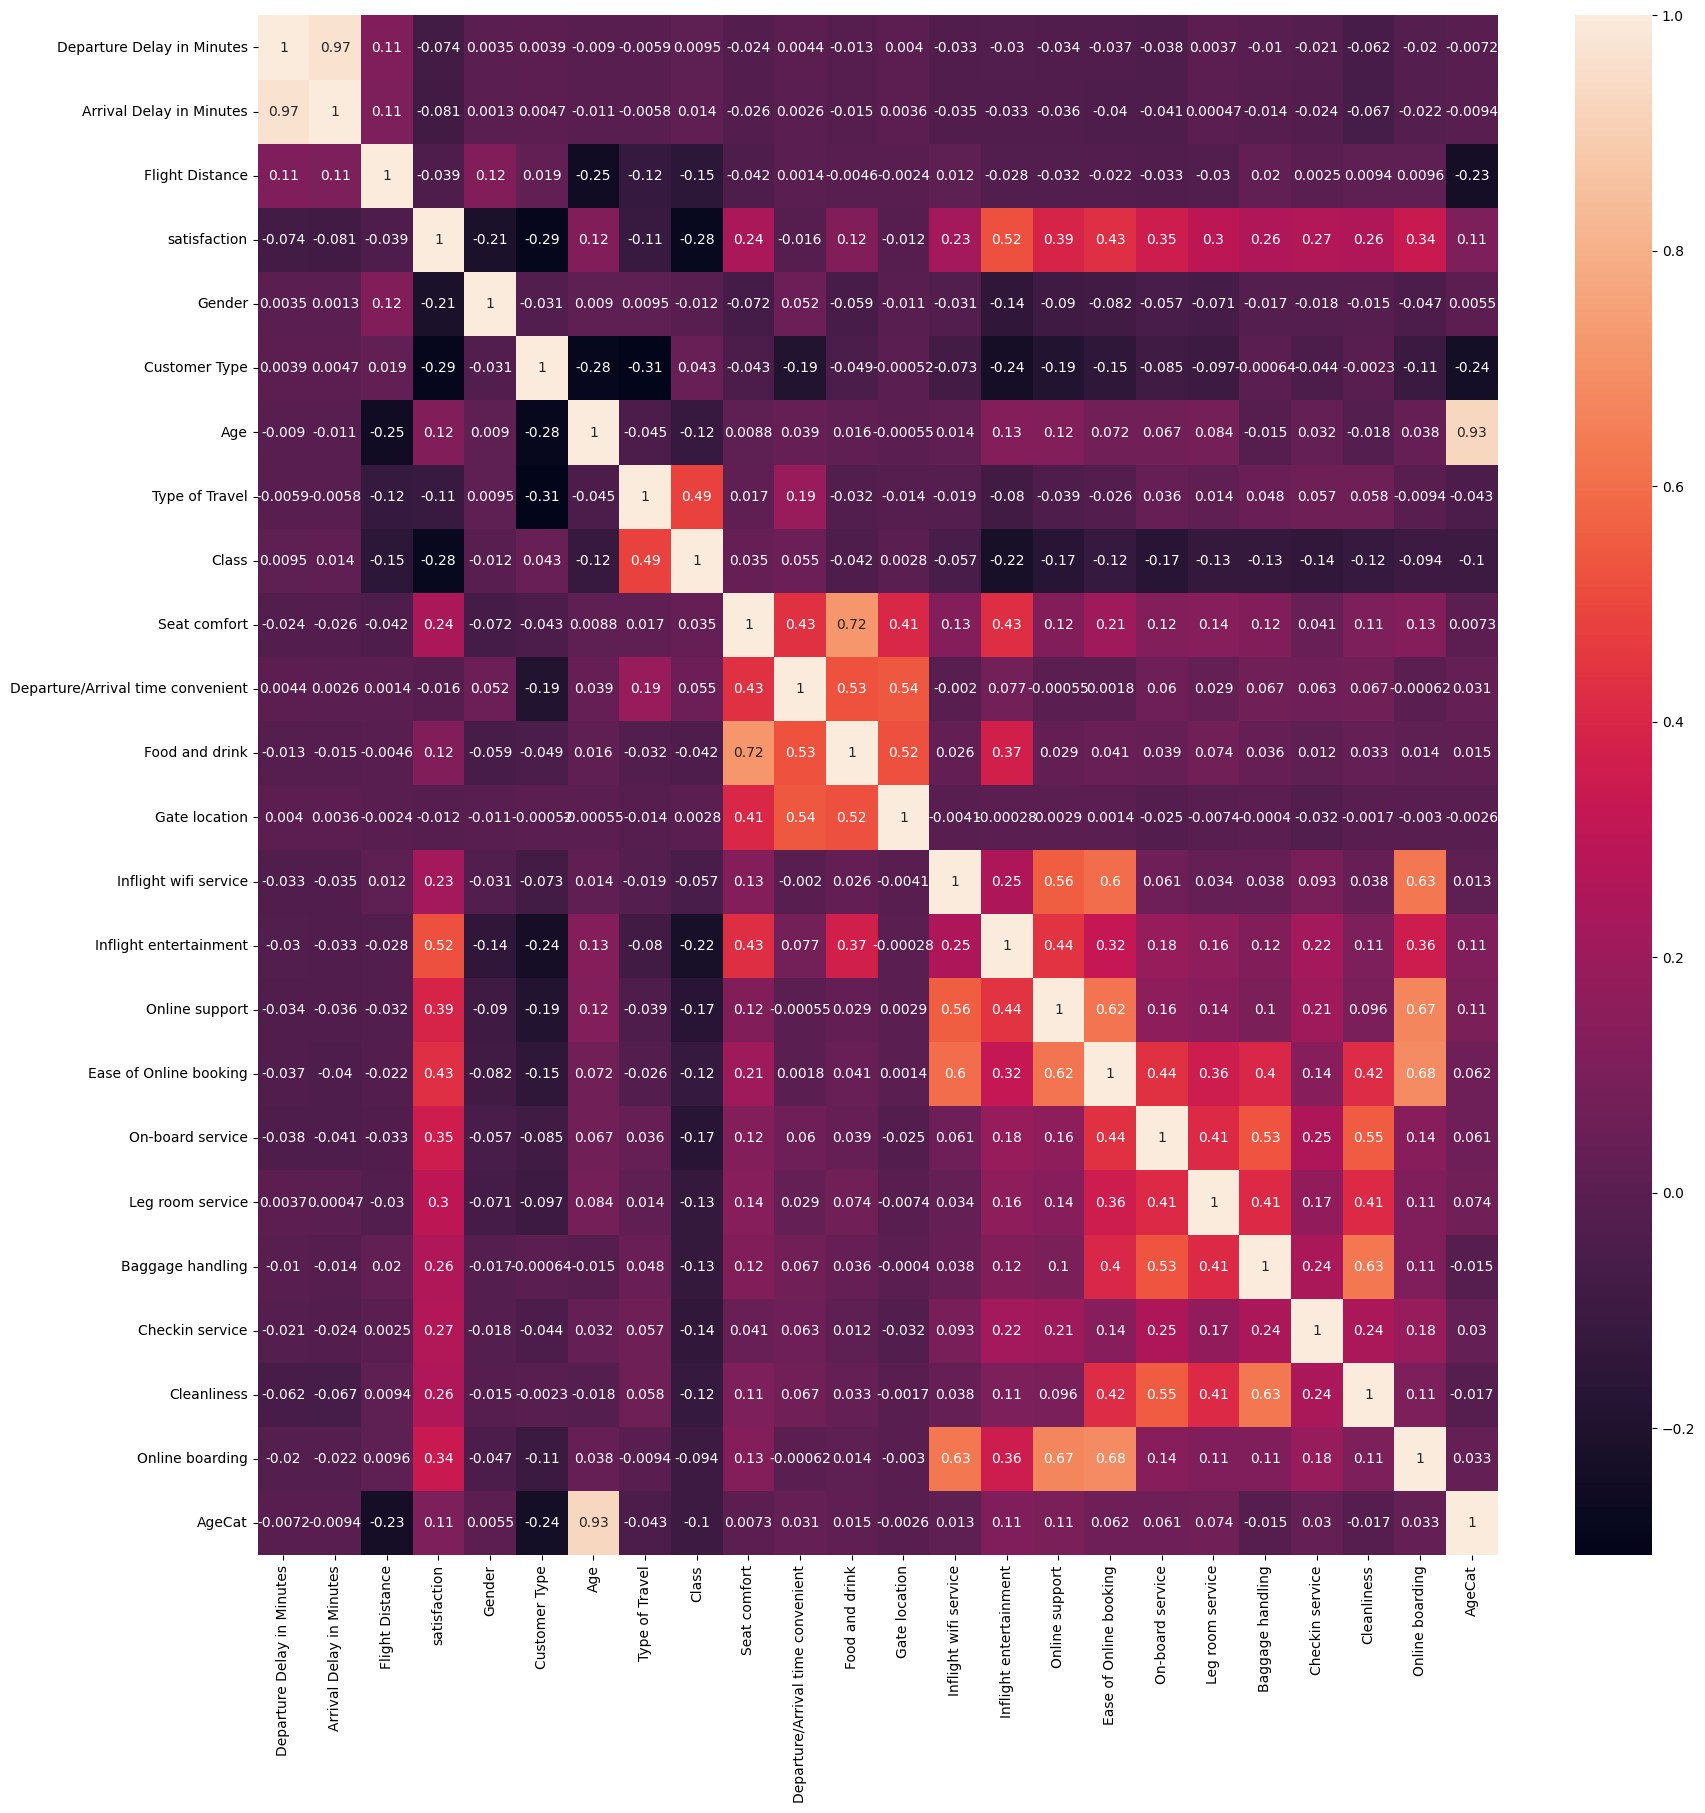

In [129]:
#Plotting a correlation matrix to check if the variables are strongly correlated or not
plt.figure(figsize=(20,20))
b = sns.heatmap(df.corr(),annot=True)
plt.show()

**FEATURE SELECTIO USING CHI-SQUARE TEST**

In [134]:
#Removing the numerical variable Age from the data
X=data_cat.drop(columns=['satisfaction','Age','AgeCat'])
Y=data_cat['satisfaction']

In [137]:
#Performing the chi-square test between the features and the target variables
chi_scores=chi2(X,Y)
chi_scores
#The first array stores the chi-square values and the second array stores the p values

(array([2.96836192e+03, 9.08324479e+03, 1.07031561e+03, 6.56994767e+03,
        5.21598579e+03, 2.43562124e+01, 1.38231979e+03, 1.07931376e+01,
        3.58450862e+03, 1.90603507e+04, 9.58754495e+03, 1.18863699e+04,
        7.50249807e+03, 5.78487373e+03, 4.36771847e+03, 4.37700147e+03,
        3.12680115e+03, 7.47131446e+03]),
 array([0.00000000e+000, 0.00000000e+000, 9.34755575e-235, 0.00000000e+000,
        0.00000000e+000, 8.00681112e-007, 1.46013588e-302, 1.01877058e-003,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]))

<Axes: >

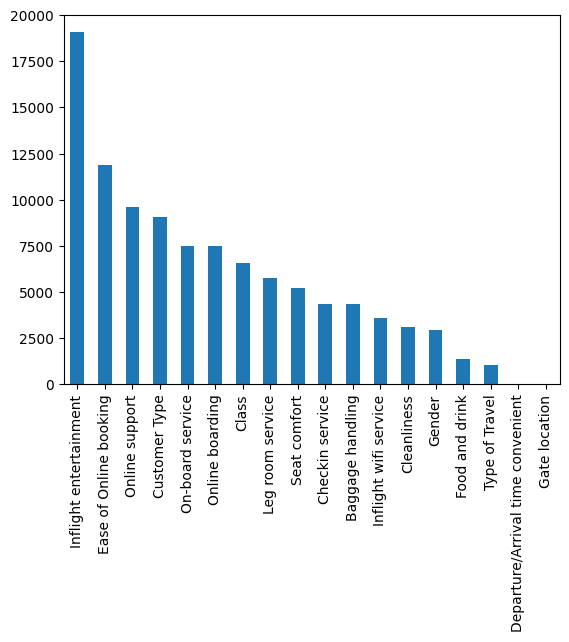

In [138]:
#We are visualising our feature set on the basis of the chi-square values
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()
#We can see that the features like Inflight entertainment, Ease of Online Booking, Online support are some of the top features that affect satisfaction level of a customer

**INDEPENDEMT SAMPLE T-TESTS**

In [150]:
#We want to check if there is any difference between the inflight wifi services that the passengers receive and their inflight entertainment
import scipy.stats as stats
t_test=stats.ttest_ind(a=data['Inflight wifi service'],b=data['Inflight entertainment'])

In [140]:
t_test
p_value = t_test[1]

In [141]:
#We can see that there is no such difference in population means
if p_value>0.05:
  print("We reject null hypothesis. There is no difference in population means between Inflight wifi services and Inflight Entertainment")
else:
  print("We fail to reject null hypothesis. There is no difference in population means between Inflight wifi services and Inflight Entertainment")

We fail to reject null hypothesis. There is no difference in population means between inflight wifi services and inflight entertainment


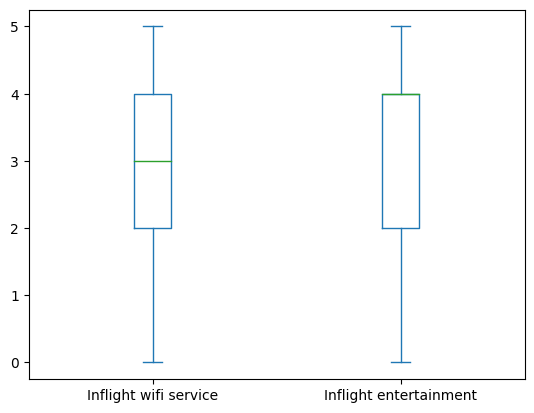

In [152]:
#The boxplots line up perfectly
ax = data[['Inflight wifi service','Inflight entertainment']].plot(kind='box')
plt.show()